<a href="https://colab.research.google.com/github/Degananda264/Automated-Machine-Learning-/blob/master/Using_AutoViML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install autoviml

In [18]:
!pip install shap

In [0]:
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd

In [0]:
BASE_DIR = '/tmp'
OUTPUT_FILE = os.path.join(BASE_DIR, 'churn_data.csv')

In [0]:
churn_data=urllib.request.urlretrieve('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv', OUTPUT_FILE)

In [0]:

churn_df = pd.read_csv(OUTPUT_FILE)

In [23]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
churn_df.shape

(7043, 21)

In [0]:
size = int(0.7*churn_df.shape[0])
train_df = churn_df[:size]
test_df = churn_df[size:]

In [0]:
from autoviml.Auto_ViML import Auto_ViML


In [0]:
target='Churn'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (4930, 21)
    Training Set Memory Usage = 0.79 MB
Test Set Shape = (2113, 21)
    Test Set Memory Usage = 0.34 MB
Single_Label Target: ['Churn']
Shuffling the data set before training
 Class  -> Counts -> Percent
    No:    3641  ->   73.9%
   Yes:    1289  ->   26.1%
Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
String or Multi Class target: Churn transformed as follows: {'No': 0, 'Yes': 1}
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  10
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Num

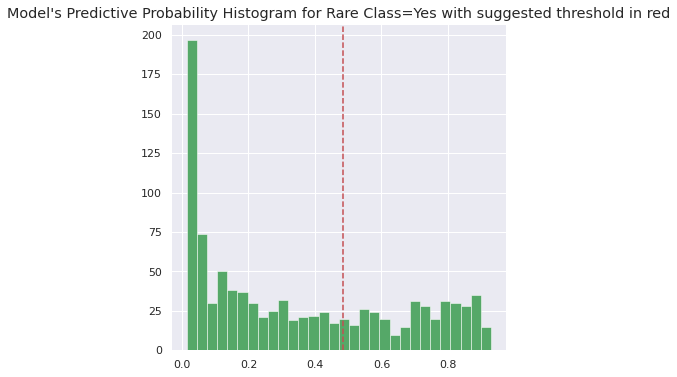

    Using threshold=0.5. However, 0.483 provides better F1=0.64 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 77.4%
Balanced Accuracy = 75.01% with Threshold = 0.50
Confusion Matrix:
[[574 141]
 [ 82 189]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       715
           1       0.57      0.70      0.63       271

    accuracy                           0.77       986
   macro avg       0.72      0.75      0.73       986
weighted avg       0.79      0.77      0.78       986

Balanced Accuracy = 75.88% with Threshold = 0.48
Confusion Matrix:
[[568 147]
 [ 75 196]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.84       715
           1       0.57      0.72      0.64       271

    accuracy                           0.77       986
   macro avg       0.73      0.76      0.74

After multiple models, Ensemble Model Results:
    Balanced Accuracy Score = 75.698%
              precision    recall  f1-score   support

           0       0.88      0.79      0.84       715
           1       0.57      0.72      0.64       271

    accuracy                           0.77       986
   macro avg       0.73      0.76      0.74       986
weighted avg       0.80      0.77      0.78       986

[[568 147]
 [ 76 195]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


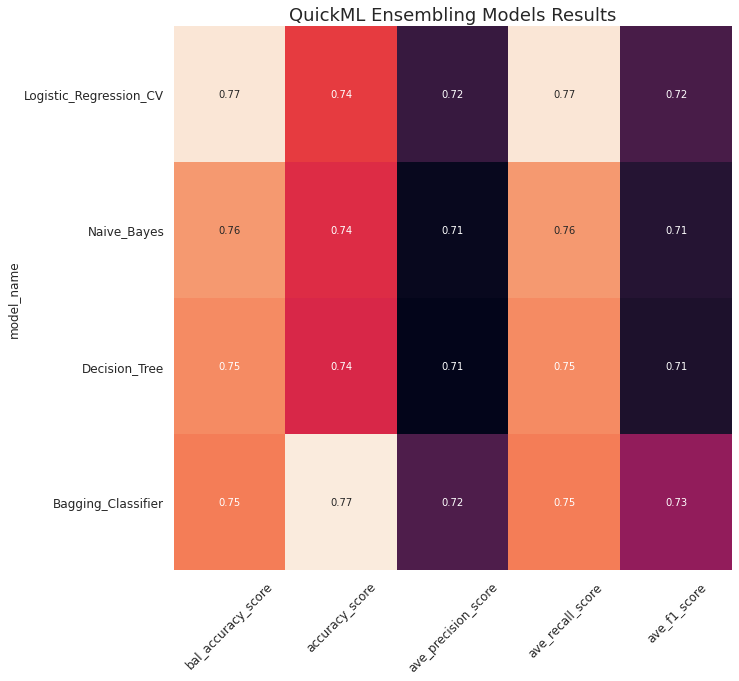

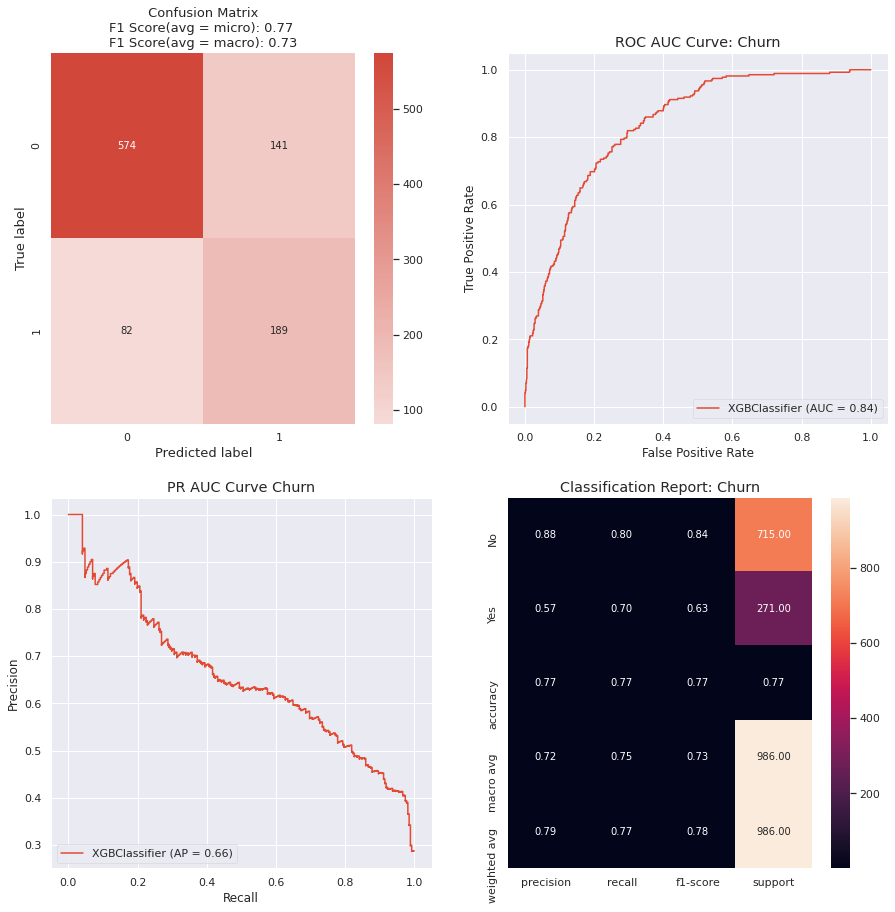

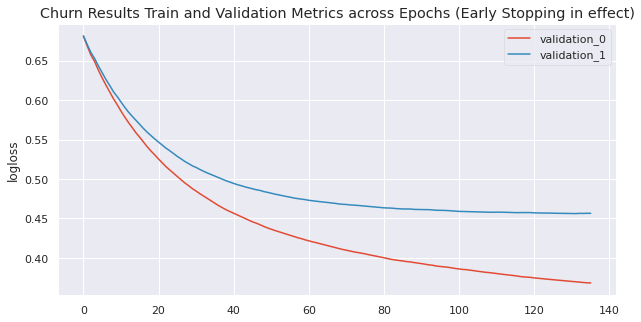

    Time taken for this Target (in seconds) = 56
Training model on complete Train data and Predicting using give Test Data...
    Binning_Flag set to False or there are no numeric vars in data set to be binned
Feature scaling for total 14 float and integer variables completed using MinMaxScaler(copy=True, feature_range=(0, 1))...
##################  Imbalanced Flag Set  ############################
Imbalanced Class Training using SMOTE Rare Class Oversampling method...
    Number of Rare Class samples = 1289
    Number of K Neighbors selected for SMOTE = 10
    Pct of Rare Class in data = 26.15%
This is not an Imbalanced data set. No need to use SMOTE but continuing...
    SMOTE completed. Actual time taken = 0 seconds
##################  Training XGBClassifier on Imbalanced data...  ################
Imbalanced class training completed.
Actual Training time taken in seconds = 2
    Making test Data predictions using modified Threshold = 0.483
    Calculating weighted average ensemble o

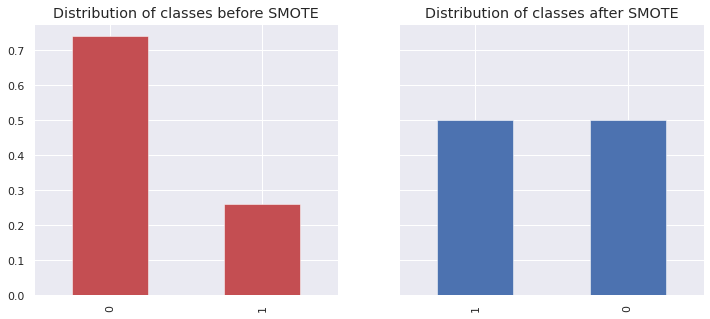

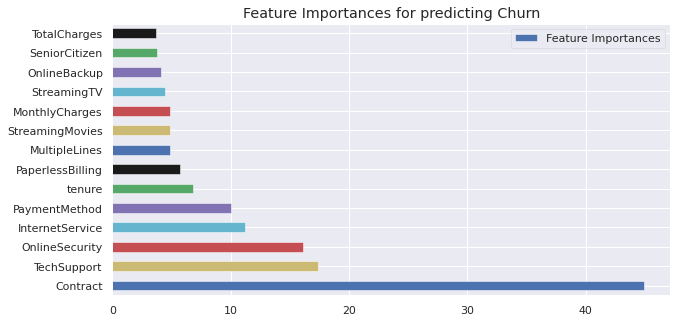

In [29]:
model, features, trainm, testm = Auto_ViML(train_df, target, test_df, sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='RS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False, 
                                    Imbalanced_Flag=True, 
                                    verbose=1)

In [30]:
features

['Contract',
 'OnlineSecurity',
 'TechSupport',
 'InternetService',
 'tenure',
 'StreamingMovies',
 'MonthlyCharges',
 'SeniorCitizen',
 'PaperlessBilling',
 'OnlineBackup',
 'MultipleLines',
 'PaymentMethod',
 'StreamingTV',
 'TotalCharges']

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(confusion_matrix(test_df[target].values,testm['Churn_XGBoost_predictions'].values))

[[1240  293]
 [ 184  396]]


In [36]:
print(confusion_matrix(test_df[target].values,testm['Churn_Ensembled_predictions'].values))

[[1243  290]
 [ 185  395]]
